In [38]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [39]:
query_path_dir = './data/query'
text_path_dir = './data/query_txt'
gallery_path_dir = './data/gallery'

save_cropped_query_dir = './data/cropped_query'
save_gallery_feat_dir = './data/gallery_feature'
save_query_feat_dir = './data/query_feature'

# Getting the Descriptors for the Gallery Images

In [22]:
sift = cv2.SIFT_create()
dict1={}

for filename2 in tqdm(os.listdir(gallery_path_dir)):
    if filename2.endswith('.jpg'):
        gallery_img = cv2.imread(os.path.join(gallery_path_dir, filename2))
        gallery_img = cv2.cvtColor(gallery_img,cv2.COLOR_BGR2GRAY)

        kp_2,desc_2 = sift.detectAndCompute(gallery_img,None)

        dict1[filename2] = desc_2

100%|██████████| 5000/5000 [17:38<00:00,  4.73it/s]


# Matching the Descriptors of Cropped Query with Gallery Descriptors

Matching and saving all the 5000 files in a txt file in decending order of similarity

In [45]:
sift = cv2.SIFT_create()
f = open("SIFT_RankList_5000.txt","w")

dict_ = {}

for filename1 in tqdm(os.listdir(save_cropped_query_dir)):
    if filename1.endswith('.jpg'):
        query_img  = cv2.imread(os.path.join(save_cropped_query_dir, filename1))
        #query_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        kp_1,desc_1 = sift.detectAndCompute(query_img, None)

        for key, val in dict1.items():

            bf = cv2.BFMatcher()
            matches = bf.knnMatch(desc_1, val, k=2)

            # Apply ratio test to find good matches
            good_matches = []
            for m, n in matches:
                if m.distance < 0.75 * n.distance:
                    good_matches.append(m)

            # Compute similarity score as number of good matches
            similarity_score = len(good_matches)

            dict_[key] = similarity_score 

        sorted_dict = sorted(dict_.items(), key=lambda item: item[1], reverse=True) # Sort the similarity score

        f.write('Q' + filename1.split('.')[0] + ": ")
        for tup in sorted_dict:
            key = str(tup[0]).split('.')[0]
            f.write( key + ", ")
        f.write("\n")
        f.write("\n")

f.close()

100%|██████████| 21/21 [1:43:02<00:00, 294.41s/it]


## Matching and saving the 10 best files in a txt file in decending order of similarity

In [44]:
sift = cv2.SIFT_create()
f = open("SIFT_rankList.txt","w")

dict_ = {}

for filename1 in tqdm(os.listdir(save_cropped_query_dir)):
    if filename1.endswith('.jpg'):
        query_img  = cv2.imread(os.path.join(save_cropped_query_dir, filename1))
        #query_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        kp_1,desc_1 = sift.detectAndCompute(query_img, None)

        for key, val in dict1.items():

            bf = cv2.BFMatcher()
            matches = bf.knnMatch(desc_1, val, k=2)

            # Apply ratio test to find good matches
            good_matches = []
            for m, n in matches:
                if m.distance < 0.75 * n.distance:
                    good_matches.append(m)

            # Compute similarity score as number of good matches
            similarity_score = len(good_matches)

            dict_[key] = similarity_score 

        sorted_dict = sorted(dict_.items(), key=lambda item: item[1], reverse=True) # Sort the similarity score
        best_10 = sorted_dict[0:10]

        f.write('Q' + filename1.split('.')[0] + ": ")
        for tup in best_10:
            key = str(tup[0]).split('.')[0]
            f.write( key + ", ")
        f.write("\n")

f.close()


100%|██████████| 21/21 [1:37:28<00:00, 278.48s/it]


# Displaying Result For A Single Query

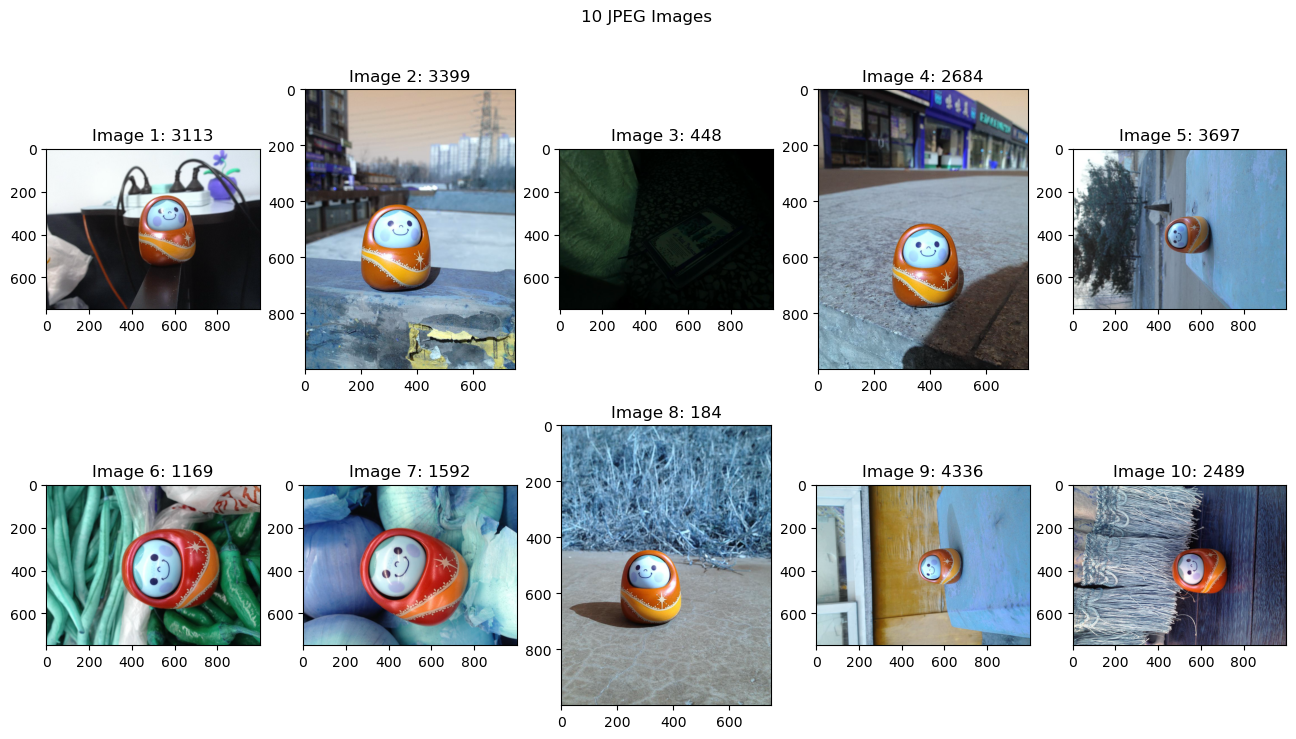

In [47]:
#Q316: 3113, 3399, 448, 2684, 3697, 1169, 1592, 184, 4336, 2489
images = []

img = [3113, 3399, 448, 2684, 3697, 1169, 1592, 184, 4336, 2489]

for i in range(10):
    images.append(cv2.imread(gallery_path_dir + '/' + str(img[i])+ '.jpg'))


fig, axs = plt.subplots(2, 5, figsize=(16, 8))
fig.suptitle('10 JPEG Images')

# Display the images in the subplots
for i in range(10):
    ax = axs[i // 5][i % 5]
    ax.imshow(images[i])
    ax.set_title(f'Image {i+1}: ' + str(img[i]))

# Show the figure
plt.show()